# Bending moment for Billy

Billy is DAVE's the lifting barge.

DAVEs shear and bending calculations use the same core are the static equilibrium solver. Therefore all forces are included. This includes the tanks, buoyancy, loads due to the crane and tie-back wires.

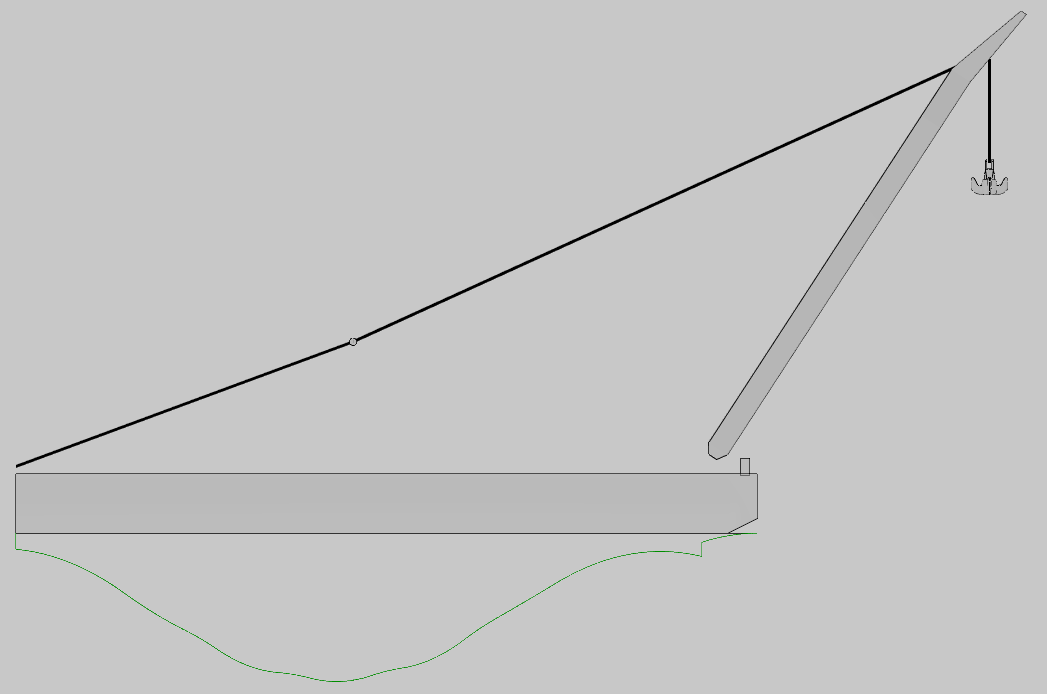

*bending*

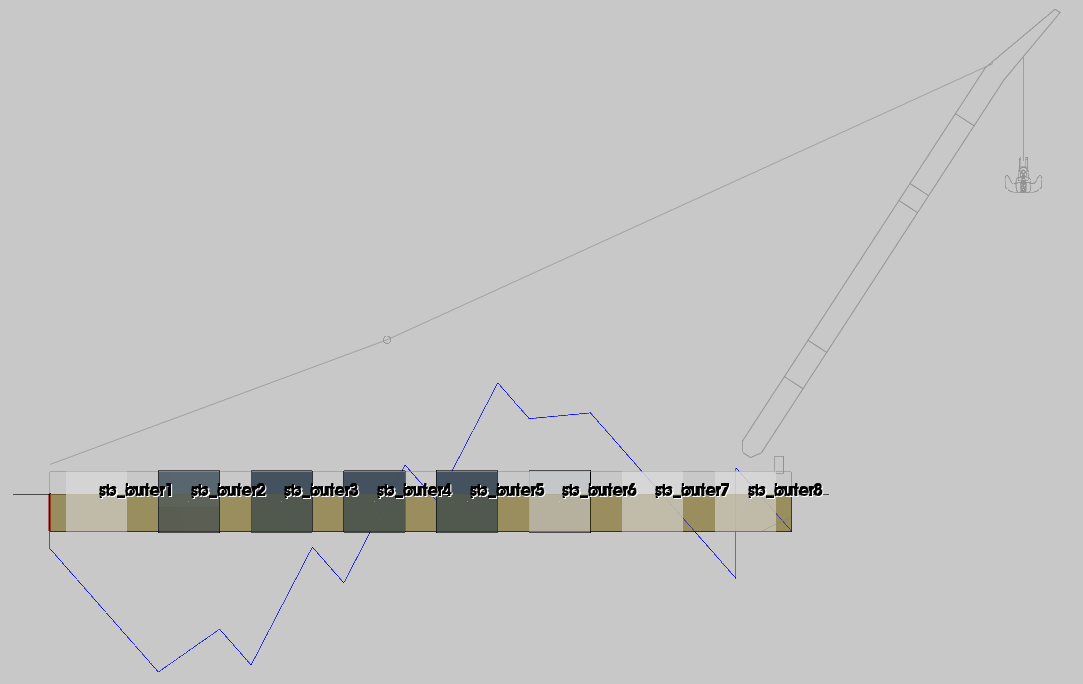

*shear*

In [1]:
from DAVE import *

Equilibrium-core version = 1.95
default resource folders:
c:\python\miniconda3\envs\dave\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
C:\data\Dave\Book\DAVE-book\DAVE-notebooks
Blender found at: C:\Program Files\Blender Foundation\Blender 2.93\blender.exe


Import Billy

In [2]:
s = Scene()
s.import_scene("res: billy.dave", containerize=False, prefix="")

Loading c:\python\miniconda3\envs\dave\lib\site-packages\DAVE\resources\billy.dave
Loading c:\python\miniconda3\envs\dave\lib\site-packages\DAVE\resources\100x30x8_barge.dave
Loading c:\python\miniconda3\envs\dave\lib\site-packages\DAVE\resources\crane block 4p.dave
Deleting Lower block [RigidBody]
Deleting Lower block visual [Visual]


c:\python\miniconda3\envs\dave\lib\site-packages\DAVE\scene.py:3491: UserWarning: BallastSystem.new_tank is outdated and may be removed in a future version.
  warn(


Ballast billy to 5m draft

In [3]:
s["ps_outer2"].fill_pct = 40
s["sb_inner2"].fill_pct = 100.0
s["sb_outer2"].fill_pct = 100.0
s["ps_inner3"].fill_pct = 100.0
s["ps_outer3"].fill_pct = 100.0
s["sb_inner3"].fill_pct = 100.0
s["sb_outer3"].fill_pct = 100.0
s["ps_inner4"].fill_pct = 100.0
s["ps_outer4"].fill_pct = 100.0
s["sb_inner4"].fill_pct = 100.0
s["sb_outer4"].fill_pct = 100.0
s["ps_inner5"].fill_pct = 100.0
s["ps_outer5"].fill_pct = 100.0
s["sb_inner5"].fill_pct = 100.0
s["sb_outer5"].fill_pct = 100.0
s["ps_inner6"].fill_pct = 100.0
s["ps_outer6"].fill_pct = 61

In [4]:
s.solve_statics()

Solved to 3.0278228223323822e-05.


True

Define the distribution of the self-weight of billy (not present in the default model at the time of writing).

Distribute the self-weight evenly over its length, from x=0 to x=100

In [5]:
s['Billy'].footprint = [(0,0,0),(100,0,0)]

And request the bending moment calc

In [6]:
lsm = s['Billy'].give_load_shear_moment_diagram()

embedWindow(verbose=True): could not load ipyvtk_simple try:
> pip install -U git+https://github.com/Kitware/ipyvtk-simple.git


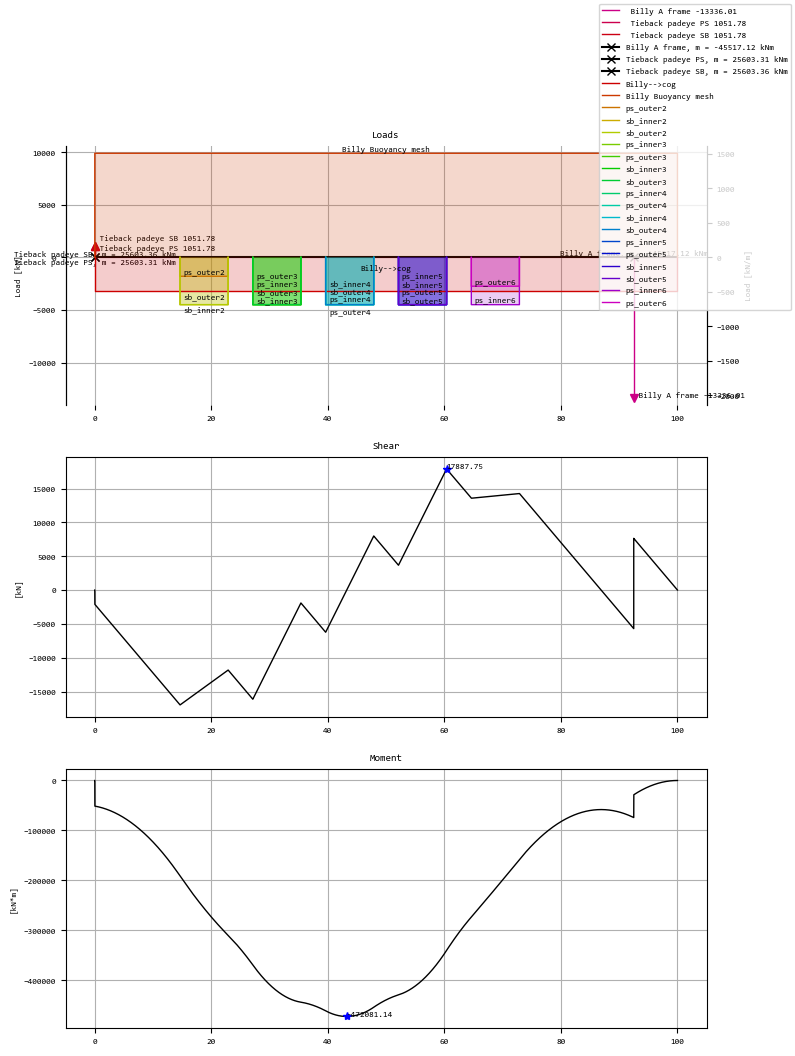

In [7]:
lsm.plot()

For a better readable plot use the .pdf export:

```python
lsm.plot(filename = r'c:\temp\bendingmoment.pdf')
```

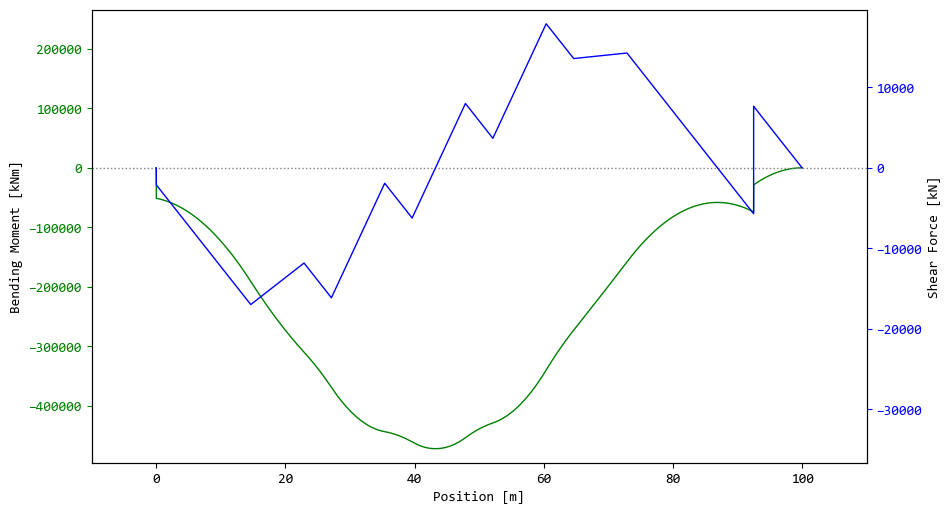

In [8]:
lsm.plot_simple(figsize=(10,6), dpi=100);